<a href="https://colab.research.google.com/github/fabiobrambilla98/InfoRetrival/blob/main/Binary_classification_spam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm

In [2]:
import urllib.request
import csv 

In [3]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [4]:
url = 'https://github.com/fabiobrambilla98/InfoRetrival/blob/main/Datasets/spamtext.csv?raw=true'

In [5]:
dataset = pd.read_csv(url) #597 3860

In [6]:
D_train = dataset[:5000]
D_test = dataset[5000:]

In [7]:
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer

In [28]:
vectorizer = TfidfVectorizer(tokenizer=word_tokenize, stop_words=[',', '.', '?', 'a', 'i', 'to', 'you'])

In [29]:
X = vectorizer.fit_transform(D_train['Message'])

In [79]:
q_n = 5321

In [80]:
q = D_test['Message'][q_n]

In [81]:
q_transform = vectorizer.transform([q])

In [82]:
from sklearn.metrics.pairwise import cosine_similarity

In [83]:
similarity = cosine_similarity(q_transform, X)

In [84]:
answers, scores = [], []
for i, s in sorted(enumerate(similarity[0]), key=lambda x: -x[1]):
  answers.append(i)
  scores.append(s)

In [85]:
from collections import defaultdict

In [86]:
I = defaultdict(lambda: 0)

In [87]:
features = vectorizer.get_feature_names_out()
for i, x in enumerate(X.toarray()[0]):
  I[features[i]] = x



In [88]:
y_true = [1 if dataset['Category'][x]==D_test['Category'][q_n] else 0 for x in answers]

In [89]:
from sklearn.metrics import precision_recall_curve

In [90]:
precision, recall, threshold = precision_recall_curve(y_true, scores)

In [91]:
import matplotlib.pyplot as plt

In [92]:
iprec = []
for i, w in enumerate(precision):
    iprec.append(max(precision[:i+1]))

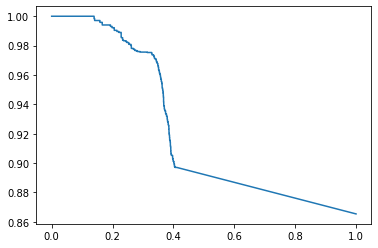

In [93]:
fig, ax = plt.subplots()
ax.plot(recall, iprec)
plt.show()

In [96]:
(np.diff(list(reversed(recall))) * (list(reversed(precision))[:-1])).sum()

0.9315275688418939

In [38]:
new_arr = []
for x in X.toarray():
  arr = []
  for val in x:
    if(val > 0):
      arr.append(1)
    else:
      arr.append(0)
  new_arr.append(arr)

In [39]:
new_arr = np.array(new_arr)

In [47]:
stopwords = []
new_arr
for i in range(len(new_arr[0])):
  times = sum(new_arr[:,i])
  if(times/len(new_arr) > 0.15):
    stopwords.append(features[i])
 
  

In [48]:
stopwords

['!', 'the']